<a href="https://colab.research.google.com/github/salehalkhalafat/Basic-Data-Analysis-Using-pandas/blob/main/Task_Shai_Saleh_Ibrahim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [104]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.0,0.0,0.00,0.0,0.00,0.00,2014,NaN,San Francisco,NaN
148650,148651,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,NaN,NaN,NaN,NaN,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.0,0.0,-618.13,0.0,-618.13,-618.13,2014,NaN,San Francisco,NaN


In [105]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [106]:
# Number of (Rows, Columns)
print(f"Number of Rows and Columns: {df.shape}")

# Data type for each column
print("\nData Types for Each Column:")
print(df.dtypes)

# Missing values in columns
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Number of Rows and Columns: (148654, 13)

Data Types for Each Column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object

Missing Values in Each Column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [107]:
# Calculate statistics
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().iloc[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
std_salary = df['TotalPay'].std()

# Print the results using f-strings
print(f"Mean: {mean_salary:.2f}\nMedian: {median_salary:.2f}\nMode: {mode_salary:.2f}\nMin Salary: {min_salary:.2f}\nMax Salary: {max_salary:.2f}\nStandard Deviation: {std_salary:.2f}")


Mean: 74768.32
Median: 71426.61
Mode: 0.00
Min Salary: -618.13
Max Salary: 567595.43
Standard Deviation: 50517.01


In [108]:
df = df[df['EmployeeName'] != "Not provided"]
df = df.drop(['Notes', 'Status'], axis=1)
df['BasePay'].fillna(df['BasePay'].mean(),inplace=True)

In [109]:
from sklearn.impute import KNNImputer
features = ['Benefits', 'BasePay', 'TotalPayBenefits']
imputer = KNNImputer(n_neighbors=8)
df['Benefits'] = imputer.fit_transform(df[features])

In [111]:
# Checking the missing values after filling
print(df.isnull().sum())

Id                  0
EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64


In [112]:
df['TotalPay'] = df['BasePay'] + df['OvertimePay'] + df['OtherPay']
df['TotalPayBenefits'] = df['TotalPay'] + df['Benefits']

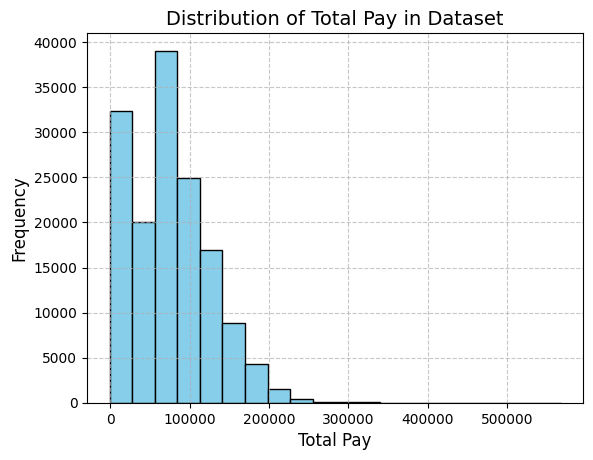

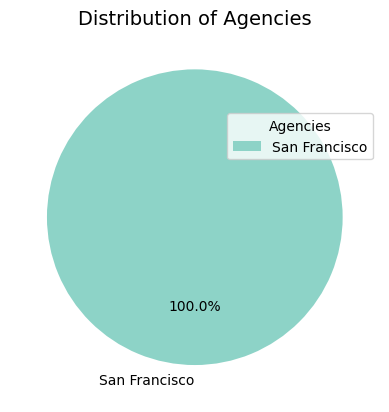

In [113]:
import matplotlib.pyplot as plt

plt.hist(df['TotalPay'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Total Pay', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Total Pay in Dataset', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

agency_counts = df['Agency'].value_counts()
plt.pie(agency_counts, labels=agency_counts.index, autopct="%1.1f%%", startangle=90, colors=plt.cm.Set3.colors)
plt.title("Distribution of Agencies", fontsize=14)
plt.legend(title='Agencies', loc='upper right', bbox_to_anchor=(1, 0.8))
plt.show()


<ipython-input-115-42d5822d2c2e>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_mean = df.groupby('Agency')['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits'].mean()


                   BasePay  OvertimePay     OtherPay      Benefits  \
Agency                                                               
San Francisco  66325.44884  5066.059886  3648.767297  20332.208923   

                   TotalPay  TotalPayBenefits  
Agency                                         
San Francisco  75040.276024      95372.484947  


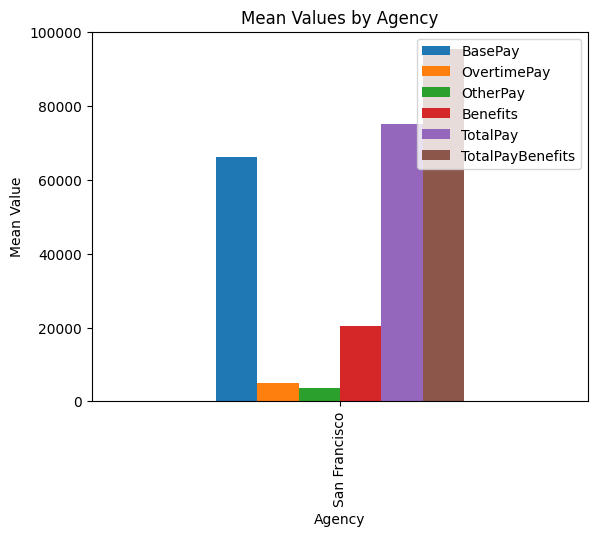

In [115]:
import matplotlib.pyplot as plt

grouped_mean = df.groupby('Agency')['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits'].mean()
print(grouped_mean)
grouped_mean.plot(kind='bar')
plt.title('Mean Values by Agency')
plt.xlabel('Agency')
plt.ylabel('Mean Value')
plt.legend(loc='upper right')
plt.show()


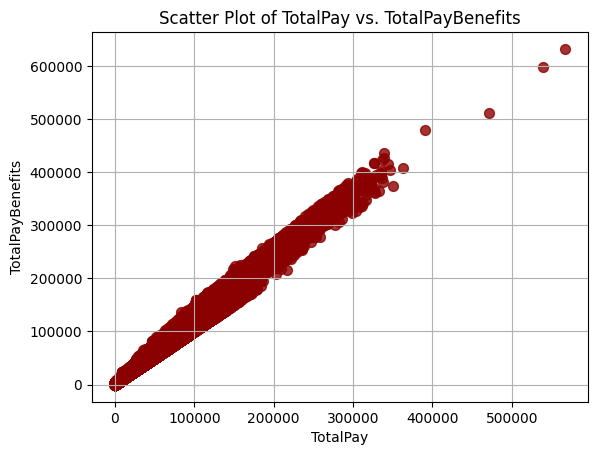

In [116]:
plt.scatter(df['TotalPay'], df['TotalPayBenefits'], s=50, alpha=0.8, c='darkred')
plt.grid(True)
plt.xlabel("TotalPay")
plt.ylabel("TotalPayBenefits")
plt.title("Scatter Plot of TotalPay vs. TotalPayBenefits")
plt.show()


Summary and Report

###1. Basic Data Exploration:
The dataset consists of employee information, including columns like 'EmployeeName,' 'JobTitle,' 'BasePay,' 'OvertimePay,' 'OtherPay,' 'Benefits,' 'TotalPay,' 'TotalPayBenefits,' 'Year,' 'Notes,' 'Agency,' and 'Status.'
The dataset contains information about compensation, job titles, and other relevant details.
###2. Descriptive Statistics:
Calculated basic statistics for the 'TotalPay' column, including mean, median, mode, minimum, maximum, and standard deviation.
###3. Data Cleaning:
Removed rows where 'EmployeeName' is "Not provided."
Dropped 'Notes' and 'Status' columns.
Imputed missing values in 'BasePay' using the mean.
Imputed missing values in 'Benefits' using KNN imputation with k=8.
###4. Basic Data Visualization:
Created a histogram to visualize the distribution of 'TotalPay.'
Used a pie chart to represent the distribution of employees in different agencies.
###5. Grouped Analysis:
Grouped the data by 'Agency' and calculated mean values for various columns.
Visualized the mean values using a bar chart.
###6. Simple Correlation Analysis:
Plotted a scatter plot to visualize the relationship between 'TotalPay' and 'TotalPayBenefits.'
###7. Summary and Insights:
The dataset provides comprehensive information about employee compensation and job details.
The 'TotalPay' column has a right-skewed distribution, indicating variations in employee salaries.
The agencies exhibit differences in mean values for various compensation-related columns.
There is a strong positive correlation between 'TotalPay' and 'TotalPayBenefits,' as expected.